# Audio Preprocessing with Librosa & Python3

Audio is a form of time series data since it fluctuate amplitute and frequency properties over the time dimension. Audio preprocessing is vital to extract the important features out of the raw audio data. This operation highly used in audio classification, audio fingerprinting, audio tagging, audio anomaly detection, audio segementation and many more applications.

Main objective of this notebook is to provide all-in-one audio preprocessing and feature extraction techniques to use in day today audio applications with **librosa** and **python3**.

In [1]:
# Import necessary libraries
import numpy as np # data manipulation, linear algebra
import librosa, librosa.display #audio processing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visulization

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input/audiopreprocess'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/audiopreprocess/the-beat-of-nature-122841.mp3
/kaggle/input/audiopreprocess/wooshing-fan-68374.mp3


## Working with Audio Files

For any audio application, it is necessary to import the data that you need to preprocess. In librosa, **librosa.load** can be integrated to carry on this task. Moreover, at the initial stage, it is important to extract the information of the sound file as samplig rate, duration in s etc.

In [2]:
audio_file = "/kaggle/input/audiopreprocess/wooshing-fan-68374.mp3"
# get raw audio features
print("Sampling Rate : "+ str(librosa.get_samplerate(audio_file))+"Hz")
print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")

# import the audio files
signal, sampling_rate = librosa.load(audio_file, sr=44100, mono=False)
# Shape of features
print("Shape of Initial Data : "+ str(signal.shape))

Sampling Rate : 24000Hz
Duration : 26.9s


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Shape of Initial Data : (2, 1188584)


## Audio Channels
There are two main types of audios as Monophonic (mono) and Stereophonic (stereo) sound. It classified based on the number of channels used to record and playback audio. But there can be more than two channels as well. 
Stereo sounds are much advance and it enables to localize the data which easy to locate the position of a sound source within a space.Usually we used mono channel audio for preprocessing tasks since it is complex to analyze high-dimensional data.

Number of channels can be viewed by **.shape** attribute of the audio signal and librosa has an inbuilt function to convert into mono channel.

As in the above example, original audio file is in stereo format as it is in **(2, 1188584)** format. By converting it into mono, it takes the average of each channel and creates a new signal.

In [3]:
print(signal.shape)# Initially the signal is in stereo form (2 channels)
audio_mono = librosa.to_mono(signal)
print(audio_mono.shape) # Mono signal

(2, 1188584)
(1188584,)


## Sampling

Sampling refers to sample the signal at specific time intervals. Either you can upsample or downsample your audio files based on your requirement. 

Original sampling rate is at 44 kHz since we have observed previously. we can upsample or downsample it by **librosa.resample()** function

In [4]:
# Original Sampling Rate is 44 kHz
print("Original Sampling Rate : "+str(sampling_rate)+" Hz")
# Downsample to 22 kHz
signal_22k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=22050)
# Upsample to 88 kHz
signal_88k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=88200)
print(signal_22k.shape)
print(signal_88k.shape)

Original Sampling Rate : 44100 Hz
(594292,)
(2377168,)


## Visualize Audios as a Waveform

Waveplot gives a high level representation of the audio in time domain with amplitude in the y axis.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1080x720 with 0 Axes>

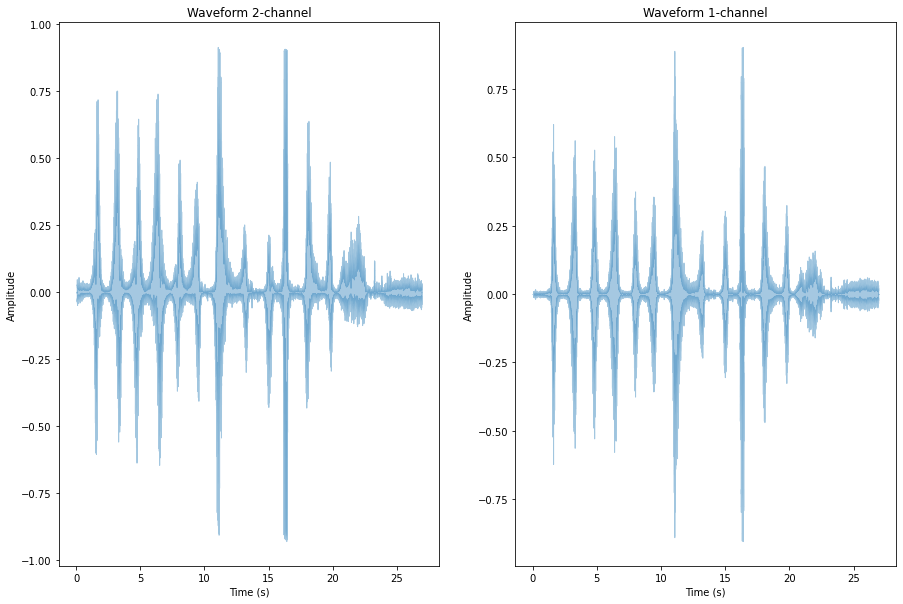

In [5]:
FIG_SIZE = (15,10)
plt.figure(figsize=FIG_SIZE)
plt.subplots(1,2, figsize=FIG_SIZE)
plt.subplot(1,2,1)
librosa.display.waveshow(signal, sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform 2-channel")

plt.subplot(1,2,2)
librosa.display.waveshow(audio_mono, sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform 1-channel")
plt.show()

In [6]:
# Change the sampling and channels
audio, sr = librosa.load(audio_file, sr=22050, mono=True)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


## Time domain vs Frequency domain

As you observe in the previous diagram, it is much complex to take a greater understanding about the .wav file features from the raw audio waveplot. The reason is, it visulized in time domain and no any mathematical representation is available. On the contray, frequency domain delivers lot more understanding via decomping complex waves as a sum of sine wave oscillations. This operation often known as Fourier Transformation.

## Fast Fourier Transformation

This will result a **spectrum** as time is in x-axis and frequency is in y-axis. Discrete Fourier Transformation or DFT is transform digital signal into frequency representation. But, Fast Fourier Transformation or FFT is widely used as an efficient fourier transformation technique for audio processing. It takes the DFT and its inverse by factorization into sparse matrix.

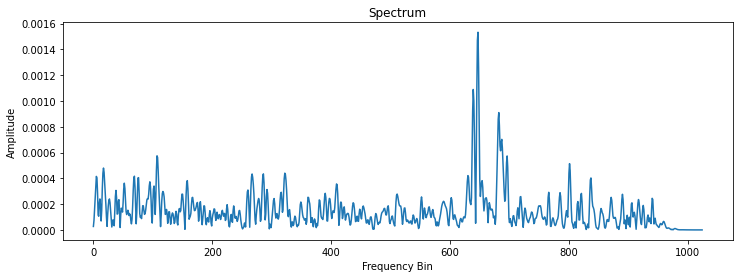

In [7]:
n_fft = 2048

ft = np.abs(librosa.stft(audio[:n_fft], n_fft=n_fft, hop_length = n_fft+1))

plt.figure(figsize=(12, 4))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

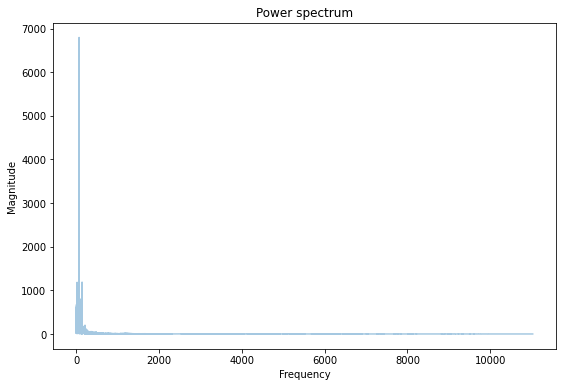

In [8]:
#FFT - Fast Fourier transform
fft = np.fft.fft(audio)
# Calculate absolute values on complex numbers to get magnitude
spectrum = np.abs(fft)
# Create frequency variable
f = np.linspace(0, sr, len(spectrum))
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# Plot spectrum
plt.figure(figsize=(9,6))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

## Short-Time Fourier Transform

In FFT, we lost information of time when we are converting from time domain to frequency domain representation. As a remedy, Short Time Frequency Transform can be applied. 

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


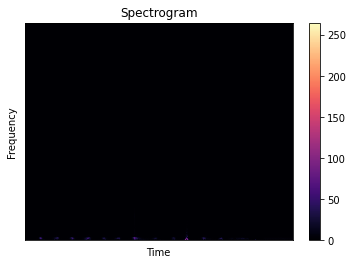

In [9]:
# load audio file
signal, sample_rate = librosa.load(audio_file, sr=22050)

hop_length = 512 # In num. of samples
n_fft = 2048 # Window in num. of samples

# Calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Perform stft and take the absolute value 
spectrogram = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))

# Display spectrogram
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()

Above plot not gonna display much information (very tiny area is visible). Reason is human auditory space is very thin and most sounds humans hear are concentrated in very small frequency and amplitude ranges. A small adjustment will display more discriptive view of spectrum as below.

Text(0.5, 1.0, 'Spectrogram (dB)')

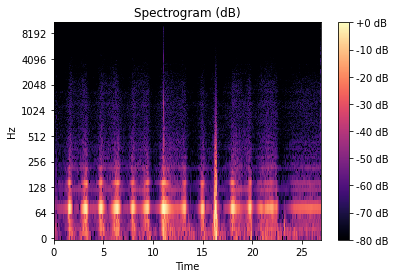

In [10]:
# Magnitude scaling of an amplitude spectrogram to dB-scaled spectrogram.
DB = librosa.amplitude_to_db(spectrogram, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title("Spectrogram (dB)")

Above representation known as **spectrogram**. As display in the code, we applied logarithm to cast amplitude to Decible (DB) scale for previously compute stft spectrogram. As you may have understood, STFT produce by computing FT at different intervals. By doing so it preseves the time dimension information.

This STFT information is an essential input for any deep learning based model.

## Mel Spectrogram

Many practitioners directly apply the mel-scale without knowing the internals of it. Mel scale deliberately implement based on human perceiveness of frequency. As humans, we can easily to differentiate the 500Hz and 1000Hz (low freq) signal but not 9000Hz and 9500Hz (high freq) signals. But, both contains same frequency difference. Researchers (Stevans, Volkmann and Newmann) identify this human intuition, also they have shown that it is a non-linear scale since perception distance is not same as frequecny distance. They implemented a of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the **mel scale**. Mel scale convert the raw frequency using the **mel= 1127.01048 * log(f/700 +1)** mathemtical operation.

Mel specrogram depcits the where the frequencies are converted to the mel scale. Librosa provided the above feature with **librosa.feature.melspectrogram** function.

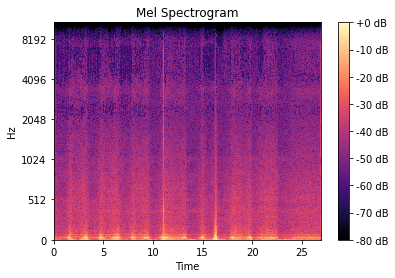

In [11]:
# Apply mel scale for the frequencies
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=1024)
# Convert it into the log scale
mel_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram, y_axis='mel', x_axis='time'); #fmax=8000 will enhance the more features
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

## Mel Frequncy Cepstral Coefficient (MFCC) 

Mel frequency is another mel-scale based feature extraction method highly utilize in speech processing applications like Music Information Retrival(MIR). MFCC is capable of identifying the timbral/textural aspects of
a signal. To be more specific, it most likely differentiate the voice of two persons with having same frequency, same pitch at same melody or we usually named it as quality of the sound.

If MFCCs to be used, the number of MFCC level should be defined and the number of MFCCs will vary based on the problem. However, for this example, we will it has 8, also note down that librosa default MFCC level is 20.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


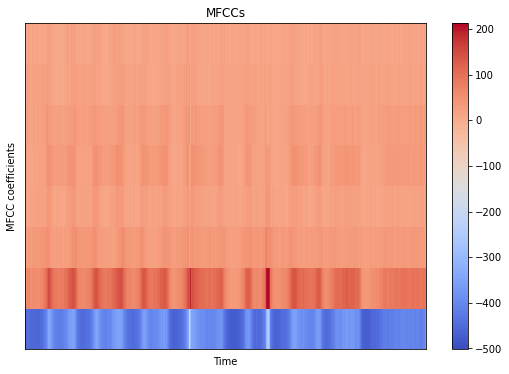

In [12]:
hop_length = 512 # In num. of samples
n_fft = 2048 # Window in num. of samples

# Extract 8 MFCCs
MFCC = librosa.feature.mfcc(audio, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=8)

plt.figure(figsize=(9,6))
librosa.display.specshow(MFCC, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

## Chormograms

Before going to chormograms it is essential to understand the pitch and octaves of a sound. Pitch is the relative highness of a sound signal. In music, we named main seven pitch based on differenct unique frequency levels as A, B, C, D, E, F and G. he pitch of A in music is about 440 Hz and so on.  An octave is periodic forms of a pitch, To align with the same example. Pitch A, the next A down on the piano, would be half the frequency, or 220 cycles per second. An octave away higher would be twice the frequency, or 880 cycles per second. So simply, it is A sharp or A flatten.

Pitch = frequency.

Octave = doubled or halved frequency of a pitch.

Chormograms is built upon chorma filters. Chorma filters aims to project all the energy of the sound wave (mostly a speech recording) into 12 bins. This acn map into the minor/major notes of a certain pitch. If we consider all those octaves, we can create a heat-map of how the pitch changes over the time axis. This is one of most important aspect of Music Retreival applications.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass sr=22050, n_fft=4096 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


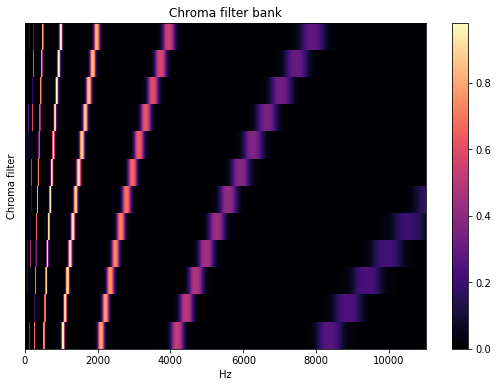

In [13]:
chromafb = librosa.filters.chroma(22050, 4096)
fig, ax = plt.subplots(figsize=(9,6))
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


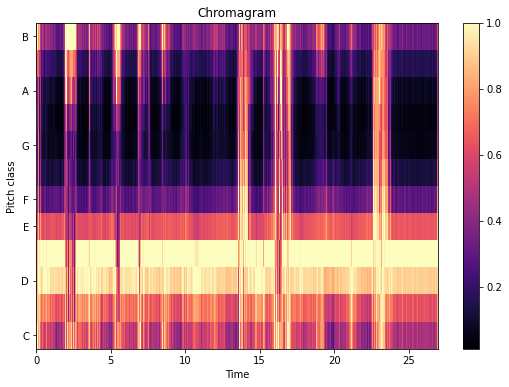

In [14]:
# Create chromagrams
chroma = librosa.feature.chroma_stft(audio, sr=sr)
# Visualize the STFT chromagrams
plt.figure(figsize=(9,6))
librosa.display.specshow(chroma, y_axis = 'chroma', x_axis='time')
plt.title('Chromagram')
plt.colorbar()
plt.show()

## Conclusion

This concludes the audio preprocessing with librosa with python. There are wide range variants with respects above mention technqiues but underlying mechnism would be the same with a small imporvement. I hope this will cover all the necessary you need to implement your audio related application. I'm hoping to publish another notebook deliberately more focusing on acoustic anomaly detection techniques with librosa.